In [2]:
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import squarify 
import matplotlib.pyplot as plt
%matplotlib inline

We will be importing our dataset and continue with some preprocessing 

In [3]:

data = pd.read_csv('Dataset/OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
data.isna().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.duplicated().sum()
data.shape

(541909, 8)

In [8]:
data.drop_duplicates(keep='first', inplace=True)
data.shape

(536641, 8)

In [9]:
retail = data.copy()

# EDA

In [10]:
retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [11]:
retail['Revenue'] = retail['Quantity']*retail['UnitPrice']

In [15]:
retail.describe()

,Quantity,UnitPrice,CustomerID,Revenue
count,536641.000000,536641.000000,401604.000000,536641.000000
mean,9.620029,4.632656,15281.160818,18.123861
std,219.130156,97.233118,1714.006089,380.656263
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13939.000000,3.750000
50%,3.000000,2.080000,15145.000000,9.870000
75%,10.000000,4.130000,16784.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


In [16]:
retail.InvoiceDate = pd.to_datetime(retail['InvoiceDate'], format='%d-%m-%Y %H:%M')

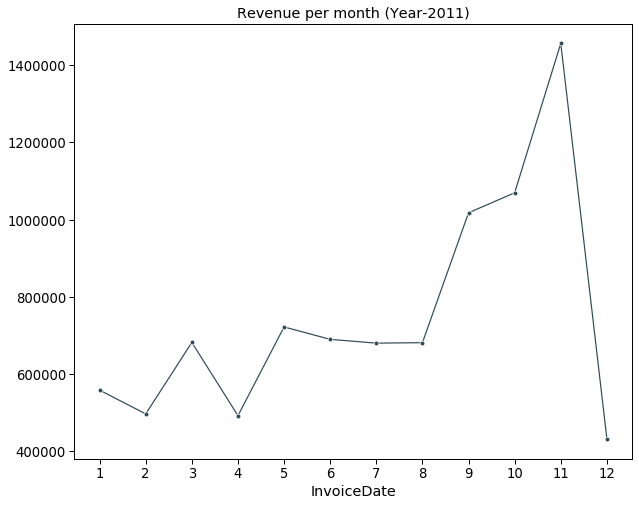

<Figure size 432x288 with 0 Axes>

In [67]:
retail_month = retail[retail.InvoiceDate.dt.year==2011]
monthly_gross = retail_month.groupby(retail_month.InvoiceDate.dt.month).Revenue.sum()

plt.figure(figsize=(10,8))


sns.set_palette('PuBuGn_d')

sns.lineplot(y=monthly_gross.values, x=monthly_gross.index, marker='o')

plt.xticks(range(1,13))

plt.title('Revenue per month (Year-2011)')
plt.show()
plt.savefig("Revenue per month 2011")

Infrence: Revenue in the month of november, ie..11 is strikingly high followed by a steep and sharp decline in december

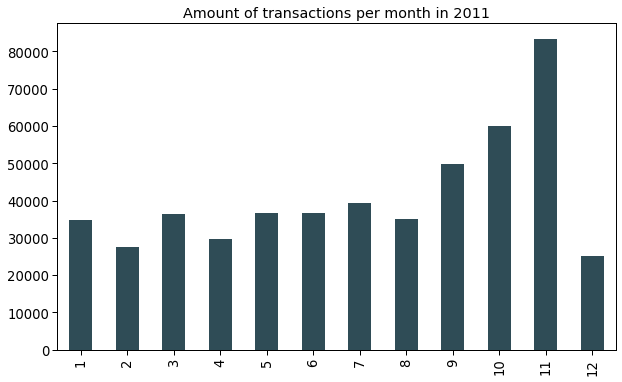

<Figure size 432x288 with 0 Axes>

In [66]:
#amount of transactions per month
plt.figure(figsize=(10,6))
retail[retail.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')
plt.title("Amount of transactions per month in 2011")
plt.show()
plt.savefig('Transactions for 2011')

Obviously the same pattern is observed in transactions, we should really check the highest selling commodities in month of november as well as december in order to better approach our data

In [29]:
retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [41]:
retail['Description'].nunique()

4223

In [42]:
products = retail_month.groupby(retail_month.InvoiceDate.dt.month).Description.nunique()

In [44]:
products

InvoiceDate
1     2566
2     2372
3     2506
4     2456
5     2480
6     2639
7     2693
8     2609
9     2771
10    2929
11    2963
12    2467
Name: Description, dtype: int64

In [48]:
monthly_gross = retail_month.groupby(retail_month.InvoiceDate.dt.month).Revenue.sum()
print(monthly_gross)

InvoiceDate
1      558448.560
2      497026.410
3      682013.980
4      492367.841
5      722094.100
6      689977.230
7      680156.991
8      681386.460
9     1017596.682
10    1069368.230
11    1456145.800
12     432701.060
Name: Revenue, dtype: float64


In [61]:
october_revenue = monthly_gross.iloc[9]
november_revenue = monthly_gross.iloc[10]
difference = november_revenue - october_revenue
print("Difference between october and november revenue", difference)


Difference between october and november revenue 386777.5699997875


In [62]:
products

InvoiceDate
1     2566
2     2372
3     2506
4     2456
5     2480
6     2639
7     2693
8     2609
9     2771
10    2929
11    2963
12    2467
Name: Description, dtype: int64

In [63]:
uniqueoct, uniquenov = products.iloc[9], products.iloc[10]
print("Unique products difference is:", uniquenov - uniqueoct)

Unique products difference is: 34


Infrence

1. Difference between products that were sold between october and novemnber is 34, 34 more unique products were addition in the month of november. Which doesn;t really seem to be that big of a number till we check the revenue difference 
2. Difference between the revenue of both months observed is +386777.56 for november

Possiblities: Maybe a fesitive season, a big sale, pre-season shopping as we see a steep decline in following month of december
    

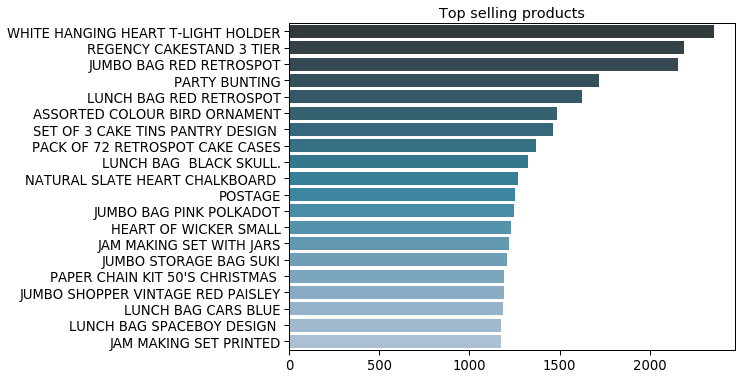

<Figure size 432x288 with 0 Axes>

In [64]:
# Let's visualize some top products from the whole range
top_products = retail['Description'].value_counts()[:20]
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values, 
           palette='PuBuGn_d')
plt.title("Top selling products")
plt.show()
plt.savefig('top_products.png')

In [68]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Cohort Analysis 

Assigining cohorts to customer based on acquisition month

In [73]:
#creating invoice month column to see first month when customer purchased 

retail["invoice_month"] = retail['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))
retail['invoice_month']


0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-12-01
541905   2011-12-01
541906   2011-12-01
541907   2011-12-01
541908   2011-12-01
Name: invoice_month, Length: 536641, dtype: datetime64[ns]

In [81]:
grouping = retail.groupby('CustomerID')['invoice_month']
retail['cohortmonth'] = grouping.transform('min')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,invoice_month,cohortmonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [82]:
#function to extract year, month, day as integers
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [86]:
#extract month
invoice_year, invoice_month, _ = get_date_int(retail, 'invoice_month')
cohort_year, cohort_month, _ = get_date_int(retail, 'cohortmonth')

print(invoice_year, invoice_month, _)
print(cohort_year, cohort_month, _)

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: invoice_month, Length: 536641, dtype: int64 0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: invoice_month, Length: 536641, dtype: int64 0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
541904    1.0
541905    1.0
541906    1.0
541907    1.0
541908    1.0
Name: cohortmonth, Length: 536641, dtype: float64
0         2010.0
1         2010.0
2         2010.0
3         2010.0
4         2010.0
           ...  
541904    2011.0
541905    2011.0
541906    2011.0
541907    2011.0
541908    2011.0
Name: cohortmonth, Length: 536641, dtype: float64 0         12.0
1         12.0
2         12.0
3         12.0
4         12.0
          ... 
541904     8.0
541905     8.0
541906     8.0
541907     8.0
5

In [87]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

print(years_diff)
print(months_diff)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
541904    0.0
541905    0.0
541906    0.0
541907    0.0
541908    0.0
Length: 536641, dtype: float64
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
541904    4.0
541905    4.0
541906    4.0
541907    4.0
541908    4.0
Length: 536641, dtype: float64


In [88]:
# Extract the difference in days from all previous values
retail['CohortIndex'] = years_diff * 12 + months_diff + 1
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,invoice_month,cohortmonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1.0


In [91]:
#count monthly active customers from each cohort
grouping = retail.groupby(['cohortmonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='cohortmonth', columns = 'CohortIndex', values='CustomerID')

cohort_counts  #Our pivot table for cohort analysis 

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohortmonth,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3) * 100
retention.head(20)

CohortIndex,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
cohortmonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


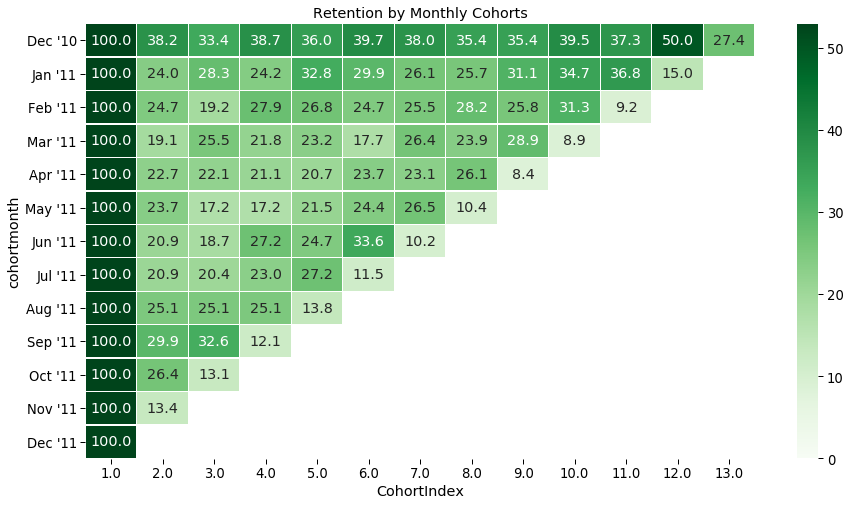

<Figure size 432x288 with 0 Axes>

In [95]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()
plt.savefig("Retention By Monthly Cohorts")

